In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd

## 1. Load Data

In [3]:
br_pd = pd.read_csv('output/br.csv')

In [4]:
score_pd = pd.read_csv('output/score.csv')

In [5]:
sill_pd = pd.read_csv('output/sill.csv')

### 1-1. Test data

In [6]:
uid = '0307ea84b89fceab3b507fec1900ce7e'

In [7]:
br_pd[br_pd['username']=='0307ea84b89fceab3b507fec1900ce7e'].shape

(9940, 10)

In [8]:
score_pd[score_pd['username']=='0307ea84b89fceab3b507fec1900ce7e']

,username,score
57,0307ea84b89fceab3b507fec1900ce7e,86


In [9]:
sill_pd[sill_pd['username']=='0307ea84b89fceab3b507fec1900ce7e']

,username,#1,#2,#3,#4,#5,#6,#7,#8,#9,...,#39,#40,#41,#42,#43,#44,#45,#46,#47,#48
33,0307ea84b89fceab3b507fec1900ce7e,3,4,3,3,4,2,4,3,4,...,4,3,3,4,3,3,1,1,1,3


### 1-2. Data chara

In [10]:
score_pd.nunique()

username    119
score        47
dtype: int64

In [11]:
br_pd.nunique()

contents_name         68
operation_date    363811
operation_name        24
page_no               26
marker_color           2
marker_text         9166
memo_title           328
memo_text           5906
username             124
class                  2
dtype: int64

In [12]:
sill_pd.nunique()

username    104
#1            5
#2            5
#3            5
#4            5
#5            5
#6            5
#7            5
#8            5
#9            5
#10           5
#11           5
#12           5
#13           5
#14           5
#15           5
#16           5
#17           5
#18           5
#19           4
#20           5
#21           5
#22           5
#23           5
#24           5
#25           5
#26           5
#27           5
#28           5
#29           5
#30           5
#31           5
#32           5
#33           5
#34           5
#35           5
#36           5
#37           5
#38           5
#39           5
#40           5
#41           5
#42           5
#43           5
#44           5
#45           5
#46           5
#47           5
#48           5
dtype: int64

### 1-3. Merge Data sets

In [13]:
score_pd = score_pd.set_index('username')
sill_pd = sill_pd.set_index('username')

In [14]:
br_grouped = br_pd.groupby(['username', 'operation_name']).size().reset_index()
br_grouped = br_grouped.pivot_table(0, ['username'], 'operation_name').fillna(0).astype('int')
br_grouped

operation_name,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,...,NEXT,NOTGETIT,OPEN,OPEN_RECOMMENDATION,PAGE_JUMP,PREV,REGIST CONTENTS,SEARCH,SEARCH_JUMP,UNDO_HW_MEMO
username,,,,,,,,,,,,,,,,,,,,,
02d679ad650962b6ae8bf8adbeeb33c1,4,188,28,8,4,25,0,38,0,2,...,1413,0,138,0,40,788,0,0,0,0
0307ea84b89fceab3b507fec1900ce7e,43,464,48,1,116,214,0,328,0,32,...,5400,1,405,0,80,2699,0,0,0,1
0a715a568a054d7996fcbcbf17b36551,1,96,28,14,0,7,0,90,0,1,...,1550,0,121,0,5,680,0,0,0,0
0c7b9053af0850d3eaa8b61de50a26cd,0,336,46,1,0,49,0,199,0,0,...,2966,0,240,0,4,1131,0,1,0,0
0cebfa477ed3e2e0c5a3f9aa96c23698,2,282,89,2,0,140,0,354,0,1,...,5242,1,419,0,215,2601,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f65238cddaeec1be538e9c1a5990e48f,12,356,47,2,13,61,0,232,0,12,...,3060,4,277,0,42,963,0,0,0,0
f79d398d62d5eaff8d7b1f9f6aaf65ab,0,145,17,0,0,24,0,102,0,0,...,1579,0,132,0,23,617,0,0,0,0
f83882e0705489c3c0514fe226fdda4f,1,33,10,0,0,19,0,184,0,1,...,3186,2,230,0,43,1572,0,0,0,0


In [15]:
merged_pd = pd.concat([br_grouped, sill_pd, score_pd], axis=1)
merged_pd = merged_pd.drop(columns=['REGIST CONTENTS'])
merged_pd

,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,...,#40,#41,#42,#43,#44,#45,#46,#47,#48,score
username,,,,,,,,,,,,,,,,,,,,,
02d679ad650962b6ae8bf8adbeeb33c1,4,188,28,8,4,25,0,38,0,2,...,4.0,2.0,3.0,5.0,5.0,1.0,5.0,5.0,2.0,59.0
0307ea84b89fceab3b507fec1900ce7e,43,464,48,1,116,214,0,328,0,32,...,3.0,3.0,4.0,3.0,3.0,1.0,1.0,1.0,3.0,86.0
0a715a568a054d7996fcbcbf17b36551,1,96,28,14,0,7,0,90,0,1,...,2.0,2.0,2.0,5.0,5.0,5.0,4.0,4.0,4.0,99.0
0c7b9053af0850d3eaa8b61de50a26cd,0,336,46,1,0,49,0,199,0,0,...,4.0,3.0,3.0,4.0,4.0,1.0,2.0,2.0,3.0,95.0
0cebfa477ed3e2e0c5a3f9aa96c23698,2,282,89,2,0,140,0,354,0,1,...,5.0,4.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f65238cddaeec1be538e9c1a5990e48f,12,356,47,2,13,61,0,232,0,12,...,4.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,100.0
f79d398d62d5eaff8d7b1f9f6aaf65ab,0,145,17,0,0,24,0,102,0,0,...,3.0,1.0,3.0,3.0,2.0,3.0,4.0,2.0,3.0,92.0
f83882e0705489c3c0514fe226fdda4f,1,33,10,0,0,19,0,184,0,1,...,3.0,2.0,4.0,3.0,3.0,3.0,3.0,2.0,4.0,65.0


## 2. Data statistics

### 2-1. Correlation matrix

In [16]:
import matplotlib.pyplot as plt

# plt.matshow(merged_pd.corr())
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')
# plt.show()

,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,DELETE MARKER,DELETE_MEMO,GETIT,MEMO_JUMP,NEXT,NOTGETIT,OPEN,OPEN_RECOMMENDATION,PAGE_JUMP,PREV,SEARCH,SEARCH_JUMP,UNDO_HW_MEMO,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12,#13,#14,#15,#16,#17,#18,#19,#20,#21,#22,#23,#24,#25,#26,#27,#28,#29,#30,#31,#32,#33,#34,#35,#36,#37,#38,#39,#40,#41,#42,#43,#44,#45,#46,#47,#48,score
ADD BOOKMARK,1.000000,0.402750,0.350277,-0.038444,0.817690,0.487637,-0.046407,0.338225,0.080735,0.622699,0.320272,0.099461,-0.018806,-0.052150,0.279689,-0.032948,0.301501,0.211127,0.152256,0.249578,0.045424,0.030141,0.034124,-0.243801,-0.098384,-0.055097,-0.097946,0.068930,-0.129928,0.092592,0.205315,0.068781,-0.163252,-0.163450,-0.164431,-0.063628,-0.040086,-0.056952,-0.175890,-0.244346,-0.076327,-0.095870,-0.197069,0.033547,-0.147587,-0.055990,-0.069856,-0.199106,-0.254408,-0.153588,-0.029817,0.062127,-0.145930,-0.021853,-0.098043,0.040174,-0.098284,-0.124858,-0.129587,-0.030222,0.014300,0.031535,0.042779,-0.009159,0.020190,0.015017,0.062913,-0.236382,-0.152381,-0.176820,-0.141239,-0.091195
ADD MARKER,0.402750,1.000000,0.606101,0.093111,0.260163,0.463751,0.104403,0.400148,0.163906,0.353813,0.607781,0.247320,-0.021904,0.147591,0.488300,0.009199,0.507979,0.239873,0.283689,0.422454,0.183766,0.207000,0.147608,-0.167275,-0.147077,-0.095238,-0.036805,-0.107022,-0.106242,-0.025103,0.030180,-0.015559,-0.200369,-0.045095,-0.075715,-0.035953,-0.176284,-0.111981,-0.102673,-0.091895,-0.034802,-0.038717,-0.222233,-0.108210,-0.128871,-0.012962,-0.109565,-0.162743,-0.088298,-0.199140,-0.145259,0.006797,-0.170232,0.062055,-0.045965,0.004314,-0.059325,-0.066790,-0.027728,0.004696,0.075336,0.053366,0.053664,-0.091376,0.072119,-0.019857,0.032366,-0.123830,-0.060971,-0.190508,-0.143461,0.221411
ADD MEMO,0.350277,0.606101,1.000000,0.074143,0.257564,0.737551,0.116785,0.487261,0.276806,0.340069,0.709688,0.532103,0.050927,0.083743,0.537074,-0.024998,0.559533,0.510883,0.535861,0.497788,0.201114,0.145280,0.197252,-0.086216,0.099239,0.008927,0.071243,-0.023619,-0.001230,0.085614,0.143885,0.119310,0.045140,0.017760,0.003267,0.004974,-0.055651,0.069437,0.121114,0.074119,0.191873,0.177696,-0.004271,0.044788,0.013062,0.116153,0.034494,0.025591,0.007337,-0.007270,0.021389,0.087147,0.071527,0.206095,0.133672,0.063825,0.120870,0.068001,0.032029,0.133584,-0.023181,0.106229,0.036694,0.115101,0.175115,-0.003603,0.086763,-0.038102,0.014366,0.003306,0.039736,0.348796
ADD_HW_MEMO,-0.038444,0.093111,0.074143,1.000000,-0.046416,-0.066362,0.860866,-0.063946,0.046810,-0.018266,0.053494,0.012156,0.060014,-0.004758,-0.058848,-0.019985,-0.004016,-0.030646,0.171133,-0.104726,0.160067,0.122401,0.414604,0.060670,0.040782,-0.063866,-0.115109,-0.049486,0.111771,-0.117459,-0.054840,-0.008331,-0.119001,0.041439,-0.033969,0.105500,0.074706,0.026145,-0.062101,0.211118,0.132369,0.013318,0.101085,-0.025903,0.144458,-0.030164,0.030768,0.175147,0.095059,-0.027347,0.150718,0.009809,0.024875,0.015224,0.061293,0.102360,0.224146,0.082335,0.151262,0.136630,0.102160,0.113045,-0.032917,-0.068336,0.107553,0.055533,0.036548,0.063071,-0.018965,0.039371,0.074371,0.148389
BOOKMARK_JUMP,0.817690,0.260163,0.257564,-0.046416,1.000000,0.425690,-0.044684,0.436975,0.077188,0.461542,0.199596,0.126502,-0.023567,-0.058825,0.351163,-0.040997,0.390920,0.056574,0.220300,0.308196,0.020449,0.008237,0.009340,-0.121495,-0.078816,0.023773,-0.051887,0.106254,-0.119513,0.148221,0.242976,0.141830,-0.119987,-0.115339,-0.092192,-0.009304,-0.014063,-0.073125,-0.140150,-0.165946,-0.085010,-0.049008,-0.187070,0.024069,-0.162373,-0.058674,0.011805,-0.121009,-0.174086,-0.090929,0.042644,0.057249,-0.123106,-0.034859,-0.076807,0.038425,-0.088987,-0.140615,-0.110071,-0.016514,0.053854,0.006712,0.043157,0.058803,-0.017715,0.113090,0.110720,-0.181075,-0.156994,-0.159900,-0.134768,-0.012912
CHANGE MEMO,0.487637,0.463751,0.737551,-0.066362,0.425690,1.000000,-0.034770,0.445208,0.206644,0.5158

### 2-2. Score dist

In [17]:
class_pd = br_pd.groupby(['username', 'class']).count().reset_index()[['username', 'class']].set_index('username')
class_pd.loc[[uid]]

,class
username,
0307ea84b89fceab3b507fec1900ce7e,a


In [18]:
# pd.concat([class_pd, merged_pd], axis=1)
merged_pd.loc[[uid]]

,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,...,#40,#41,#42,#43,#44,#45,#46,#47,#48,score
username,,,,,,,,,,,,,,,,,,,,,
0307ea84b89fceab3b507fec1900ce7e,43,464,48,1,116,214,0,328,0,32,...,3.0,3.0,4.0,3.0,3.0,1.0,1.0,1.0,3.0,86.0


In [19]:
merged_pd = merged_pd.join(class_pd)

<AxesSubplot:>

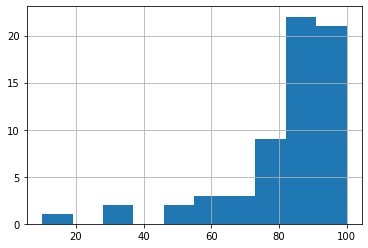

In [20]:
merged_pd[merged_pd['class']=='a']['score'].hist(bins=10)

<AxesSubplot:>

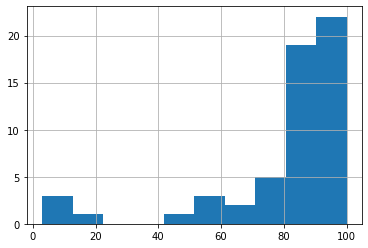

In [21]:
merged_pd[merged_pd['class']=='b']['score'].hist(bins=10)

### 2-3. PCA Analysis

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

def plt_pca (X_train, title, threshold):
    sc = StandardScaler()

    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    # X_test_std = sc.transform(X_test)
    #
    # Instantiate PCA
    #
    pca = PCA()
    #
    # Determine transformed features
    #
    X_train_pca = pca.fit_transform(X_train_std)
    #
    # Determine explained variance using explained_variance_ration_ attribute
    #
    exp_var_pca = pca.explained_variance_ratio_
    #
    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    #
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    comp = pca.components_
    
#     threshold=0.9
    running_sum = 0
    for index, entry in enumerate(exp_var_pca.flat):
        running_sum += entry
        if running_sum > threshold:
            break
    if running_sum < threshold:
        index = -1 #if the sum never reaches the threshold
    
    #
    # Create the visualization plot
    #
    plt.title(title + ', threshold='+str(threshold)+', comp='+str(index))
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.2, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    
    plt.savefig('000_'+title+'.png', dpi=300)
    
    plt.show()
    
    return X_train_pca[:,0:index], comp[:,0:index]

In [102]:
# pca = PCA()
# #
# # Determine transformed features
# #
# X_train_pca = pca.fit_transform(sill_pd)
# #
# # Determine explained variance using explained_variance_ration_ attribute
# #
# exp_var_pca = pca.explained_variance_ratio_

In [103]:
pca.components_[:15]

array([[ 1.02156221e-01,  7.68247182e-02,  1.22702407e-01,
         1.22308613e-01,  5.83435351e-02,  1.32153796e-01,
         1.15272402e-01,  4.71915249e-02,  1.27590240e-01,
         1.86581196e-01,  2.04494831e-01,  1.58121520e-01,
         2.14865001e-01,  1.75659584e-01,  2.02056347e-01,
         1.92408378e-01,  1.31084178e-01,  1.27460909e-01,
         1.04283624e-01,  1.68675331e-01,  1.50266191e-01,
         8.54915832e-02,  1.19588841e-01,  1.57777290e-01,
         1.69551317e-01,  2.02374119e-01,  1.80459699e-01,
         1.48130167e-01,  1.11857734e-01,  1.73246352e-01,
         1.01316088e-01,  1.31701871e-01,  1.40109831e-01,
         1.77381963e-01,  1.67955681e-01,  1.35094681e-01,
         1.13390106e-01,  6.59222912e-02,  7.12111943e-02,
        -3.49646756e-03,  1.34315337e-01,  1.26241857e-01,
         7.98192685e-02,  9.12079157e-02,  1.70645218e-01,
         1.80143905e-01,  1.71746151e-01,  2.20715421e-01],
       [-1.09680862e-01, -1.19523348e-01,  4.64831166e-

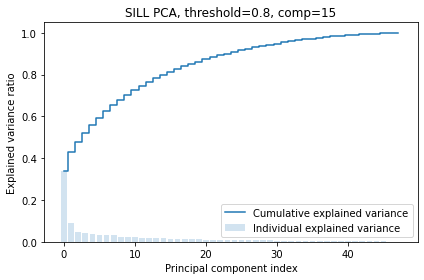

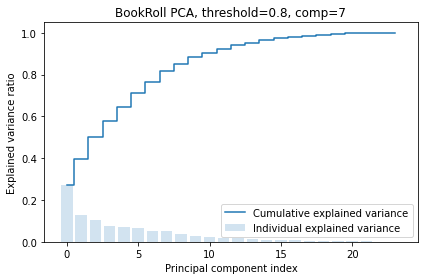

In [104]:

index = br_grouped.index.intersection(sill_pd.index)

sill_pca_np, sill_comp = plt_pca(sill_pd.loc[index], 'SILL PCA', 0.8)
br_pca_np, br_comp = plt_pca(br_grouped.loc[index], 'BookRoll PCA', 0.8)

In [105]:
sill_pca_exp

array([0.34075409, 0.08758034, 0.04779915, 0.04327128, 0.03776097,
       0.03429312, 0.03261371, 0.03022863, 0.02520228, 0.02463366,
       0.02174416, 0.01939311, 0.01898975, 0.01727971, 0.01584413,
       0.01533483, 0.01374337, 0.01297196, 0.01167102, 0.01122724,
       0.01076736, 0.00979559, 0.0092213 , 0.00875565, 0.00807707,
       0.0075568 , 0.00717787, 0.00689861, 0.0064457 , 0.00630501,
       0.00556115, 0.00538947, 0.00504776, 0.00485203, 0.00430334,
       0.00391963, 0.00363471, 0.00357572, 0.003299  , 0.00265869,
       0.00249122, 0.00235453, 0.002136  , 0.00180122, 0.00173142,
       0.0014987 , 0.00134692, 0.001061  ])

In [42]:
pd.DataFrame(br_pca_np)

,0,1,2,3,4,5,6
0,-1.502950,0.475123,0.552712,-1.424553,1.350107,-0.665677,0.553522
1,6.687246,-1.051317,-0.201544,-1.525614,-1.419527,-0.321770,1.142654
2,-2.496014,-0.127147,0.149480,-0.869342,0.205901,-0.184233,0.349198
3,-0.053106,-0.227044,0.201666,-0.779022,2.276246,-0.882271,-1.889616
4,5.951495,0.305663,-2.026217,1.315120,5.325410,-2.268588,6.117430
...,...,...,...,...,...,...,...
99,1.444563,0.027796,1.069794,-0.099367,-0.144395,0.184889,0.718388
100,-2.494217,-0.385736,0.123002,-0.812161,0.146549,0.153342,0.293261
101,-1.116127,-1.130788,-0.428840,0.765681,-0.004103,0.147385,0.196898
102,1.217998,-0.856990,0.321392,0.278168,-1.088630,0.665027,-0.480705


In [43]:
from scipy import stats
from scipy.stats import pearsonr

corr_pd = pd.DataFrame()
corr_pd_p = pd.DataFrame()

for i in range(0, pd.DataFrame(sill_pca_np).shape[1]):
    
    for j in range(0, pd.DataFrame(br_pca_np).shape[1]):
        
        corr_pd.at[i,j] = pearsonr(pd.DataFrame(br_pca_np)[j], pd.DataFrame(sill_pca_np)[i])[0]
        corr_pd_p.at[i,j] = pearsonr(pd.DataFrame(br_pca_np)[j], pd.DataFrame(sill_pca_np)[i])[1]

Text(114.0, 0.5, 'SILL Comp')

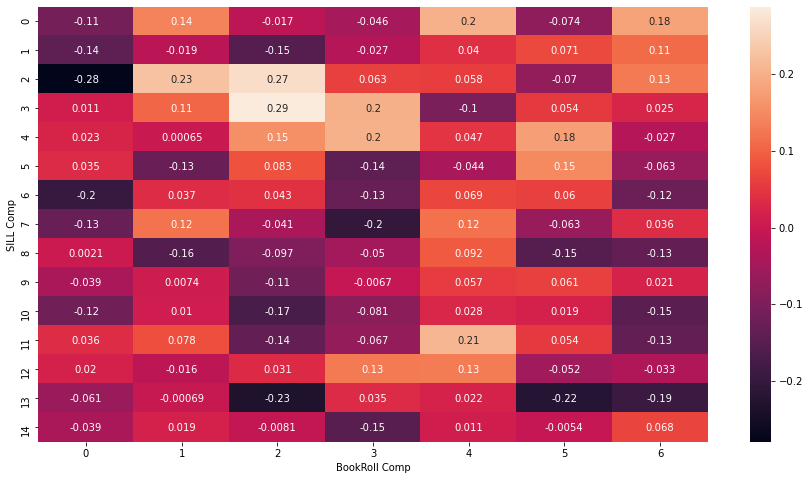

In [44]:
import seaborn as sns

plt.figure(figsize=(15,8))
g = sns.heatmap(corr_pd, annot=True)
g.set_xlabel('BookRoll Comp')
g.set_ylabel('SILL Comp')

/work/u4852065/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


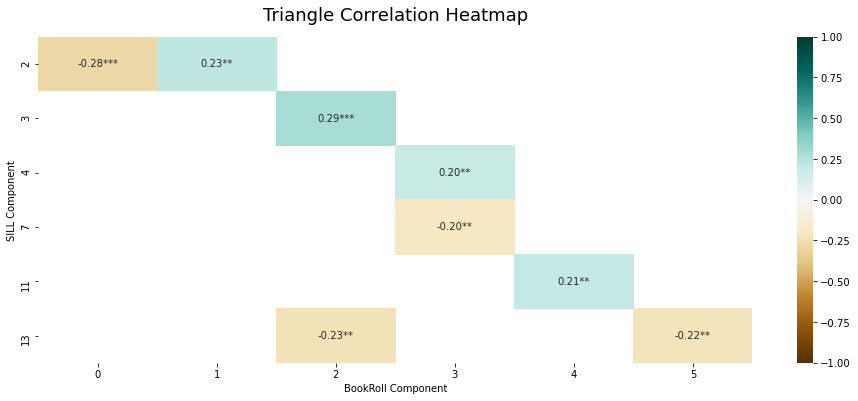

In [98]:
np.random.seed(124)
Correlazioni = pd.DataFrame(np.random.rand(7, 10), columns=[*'abcdefghij'])

plt.figure(figsize=(16, 6))
# corr = Correlazioni.corr()
corr = corr_pd

annot = [[f"{val[0]:.2f}"
          + ('*' if val[1] < 0.1 else '')  # add one star if abs(val) >= extreme_1
          + ('*' if val[1] < 0.05 else '')  # add one star if abs(val) >= extreme_1
          + ('*' if val[1] < 0.005 else '')  # add one star if abs(val) >= extreme_1

          for val in zip(row[0], row[1])] for row in zip(corr_pd.to_numpy(), corr_pd_p.to_numpy())]


mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.2  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]
    annot = pd.DataFrame(annot).iloc[wanted_cols, wanted_rows]

# annot = [[f"{val:.4f}"
#           + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
#           + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
#           + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
#           for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

heatmap.set_xlabel('BookRoll Component')
heatmap.set_ylabel('SILL Component')

plt.savefig('001_br_sill.png', dpi=300)

plt.show()

/work/u4852065/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


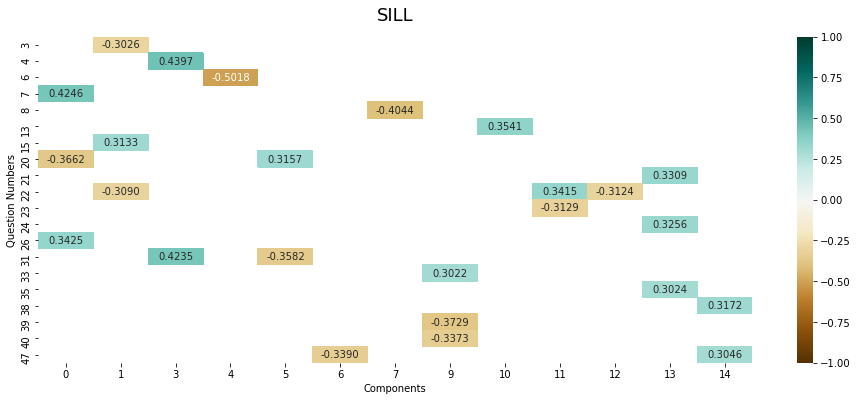

In [99]:
plt.figure(figsize=(16, 6))

corr = pd.DataFrame(sill_comp)


mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.3  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]


annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('SILL', fontdict={'fontsize': 18}, pad=16)

heatmap.set_xlabel('Components')
heatmap.set_ylabel('Question Numbers')

plt.savefig('002_sill_comp.png', dpi=300)

plt.show()

/work/u4852065/ENTER/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


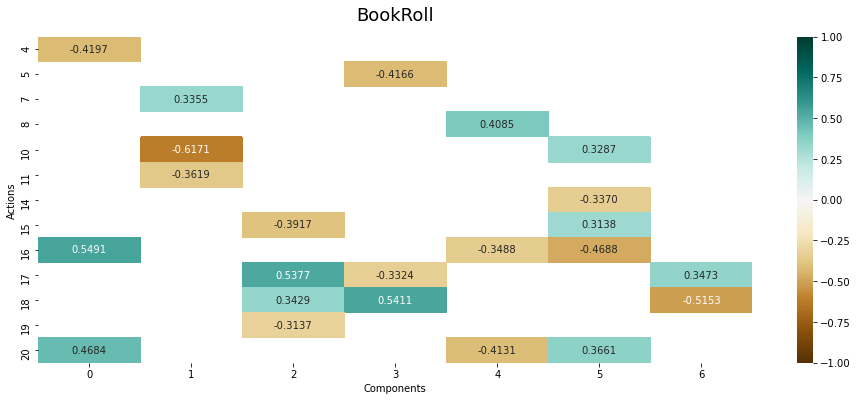

In [100]:
plt.figure(figsize=(16, 6))

corr = pd.DataFrame(br_comp)


mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.3  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]


annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('BookRoll', fontdict={'fontsize': 18}, pad=16)

heatmap.set_xlabel('Components')
heatmap.set_ylabel('Actions')

plt.savefig('003_br_comp.png', dpi=300)

plt.show()

## 3. Predict risk student

In [28]:
merged_pd['label']=0
merged_pd.loc[merged_pd['score'] > 90, 'label']=1
merged_pd

,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,...,#42,#43,#44,#45,#46,#47,#48,score,class,label
username,,,,,,,,,,,,,,,,,,,,,
02d679ad650962b6ae8bf8adbeeb33c1,4,188,28,8,4,25,0,38,0,2,...,3.0,5.0,5.0,1.0,5.0,5.0,2.0,59.0,b,0
0307ea84b89fceab3b507fec1900ce7e,43,464,48,1,116,214,0,328,0,32,...,4.0,3.0,3.0,1.0,1.0,1.0,3.0,86.0,a,0
0a715a568a054d7996fcbcbf17b36551,1,96,28,14,0,7,0,90,0,1,...,2.0,5.0,5.0,5.0,4.0,4.0,4.0,99.0,a,1
0c7b9053af0850d3eaa8b61de50a26cd,0,336,46,1,0,49,0,199,0,0,...,3.0,4.0,4.0,1.0,2.0,2.0,3.0,95.0,b,1
0cebfa477ed3e2e0c5a3f9aa96c23698,2,282,89,2,0,140,0,354,0,1,...,5.0,5.0,4.0,3.0,5.0,5.0,4.0,100.0,a,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f65238cddaeec1be538e9c1a5990e48f,12,356,47,2,13,61,0,232,0,12,...,3.0,4.0,4.0,4.0,4.0,4.0,4.0,100.0,a,1
f79d398d62d5eaff8d7b1f9f6aaf65ab,0,145,17,0,0,24,0,102,0,0,...,3.0,3.0,2.0,3.0,4.0,2.0,3.0,92.0,b,1
f83882e0705489c3c0514fe226fdda4f,1,33,10,0,0,19,0,184,0,1,...,4.0,3.0,3.0,3.0,3.0,2.0,4.0,65.0,b,0


In [29]:
xa = merged_pd[merged_pd['class']=='a'].drop(columns=['score', 'label', 'class'])
xb = merged_pd[merged_pd['class']=='b'].drop(columns=['score', 'label', 'class'])

ya = merged_pd[merged_pd['class']=='a']['label']
yb = merged_pd[merged_pd['class']=='b']['label']

In [30]:
merged_pd[merged_pd['class']=='a']['label'].shape

(68,)

In [31]:
def normalization (normal_df):
    
    min_max_scaler = preprocessing.MinMaxScaler()
    feature_names = list(normal_df)
    
    min_max_scaler = min_max_scaler.fit(normal_df.values)
    X_raw_minmax = min_max_scaler.transform(normal_df.values)
    normal_df = pd.DataFrame(X_raw_minmax, columns=feature_names)

    return normal_df, min_max_scaler

In [32]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
_, normalizer = normalization(xa)
xa_norm = normalizer.transform(xa)
xb_nrom = normalizer.transform(xb)

In [34]:
pca = PCA(n_components=2)
pca.fit(xa_norm)
xa_pca = pca.transform(xa_norm)
xb_pca = pca.transform(xb_nrom)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
svc_classa = SVC(kernel='rbf')
svc_classa.fit(xa_pca, ya)

In [ ]:
y_pred = svc_classa.predict(xa_pca)

print(confusion_matrix(ya, y_pred))
print(classification_report(ya, y_pred))

In [ ]:
y_pred = svc_classa.predict(xb_pca)

print(confusion_matrix(yb, y_pred))
print(classification_report(yb, y_pred))

In [ ]:
_, normalizer = normalization(xb)
xa_norm = normalizer.transform(xa)
xb_norm = normalizer.transform(xb)

In [ ]:
pca = PCA(n_components=2)
pca.fit(xb_norm)
xa_pca = pca.transform(xa_norm)
xb_pca = pca.transform(xb_nrom)

In [ ]:
svc_classb = SVC(kernel='rbf')
svc_classb.fit(xb_pca, yb)

In [ ]:
y_pred = svc_classb.predict(xb_pca)

print(confusion_matrix(yb, y_pred))
print(classification_report(yb, y_pred))

In [ ]:
y_pred = svc_classb.predict(xa_pca)

print(confusion_matrix(ya, y_pred))
print(classification_report(ya, y_pred))

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

ax1.scatter(xa_pca[:,0], xa_pca[:,1], alpha=0.2, label='label=1')
ax1.legend()
ax1.set_title('Class A')

ax2.scatter(xb_pca[:,0], xb_pca[:,1], alpha=0.2, label='label=2')
ax2.legend()
ax2.set_title('Class B')

ax3.scatter(xa_pca[:,0], xa_pca[:,1], label='Class A')
ax3.scatter(xb_pca[:,0], xb_pca[:,1], label='Class B')
ax3.legend()
ax3.set_title('Mix')